<a href="https://colab.research.google.com/github/Lee-Jae-Ung/DScience/blob/main/covid_death_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  


In [2]:
covid = Table.read_table('/content/all_weekly_excess_deaths.csv')
covid

country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25814400,2499,0,2566.74,-67.7427,2499,0,-0.262422,-0.0263925
Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25814400,2512,0,2561.91,-49.9094,2512,0,-0.193339,-0.0194813
Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25814400,2501,0,2539.74,-38.7427,2501,0,-0.150082,-0.0152546
Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25814400,2597,0,2539.91,57.0906,2597,0,0.221158,0.0224774
Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25814400,2511,0,2529.24,-18.2427,2511,0,-0.0706689,-0.00721273
Australia,Australia,0,2020-02-03,2020-02-09,7,2020,6,25814400,2530,0,2536.58,-6.57608,2530,0,-0.0254745,-0.0025925
Australia,Australia,0,2020-02-10,2020-02-16,7,2020,7,25814400,2613,0,2556.74,56.2573,2613,0,0.21793,0.0220035
Australia,Australia,0,2020-02-17,2020-02-23,7,2020,8,25814400,2608,0,2576.58,31.4239,2608,0,0.12173,0.012196
Australia,Australia,0,2020-02-24,2020-03-01,7,2020,9,25814400,2678,1,2568.89,109.109,2677,0.00387381,0.422666,0.0424731
Australia,Australia,0,2020-03-02,2020-03-08,7,2020,10,25814400,2602,2,2606.69,-4.69129,2600,0.00774761,-0.0181732,-0.00179971


In [17]:
vaccine = Table.read_table('/content/country_vaccinations.csv')
vaccine = vaccine.select('country','iso_code','daily_vaccinations','vaccines')
vaccine

country,iso_code,daily_vaccinations,vaccines
Afghanistan,AFG,nan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1367,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1367,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1367,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1367,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1367,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1367,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1580,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,1794,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."
Afghanistan,AFG,2008,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Si ..."


In [3]:
covid_death_korea = covid.where('country','South Korea')
covid_death_korea

country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
South Korea,South Korea,0,2019-12-30,2020-01-05,7,2020,1,51709098,6438,0,6423.32,14.6835,6438,0,0.0283964,0.00228597
South Korea,South Korea,0,2020-01-06,2020-01-12,7,2020,2,51709098,6321,0,6433.48,-112.483,6321,0,-0.217531,-0.017484
South Korea,South Korea,0,2020-01-13,2020-01-19,7,2020,3,51709098,6405,0,6415.65,-10.6498,6405,0,-0.0205956,-0.00165997
South Korea,South Korea,0,2020-01-20,2020-01-26,7,2020,4,51709098,6490,0,6365.48,124.517,6490,0,0.240803,0.0195613
South Korea,South Korea,0,2020-01-27,2020-02-02,7,2020,5,51709098,6434,0,6359.82,74.1835,6434,0,0.143463,0.0116644
South Korea,South Korea,0,2020-02-03,2020-02-09,7,2020,6,51709098,6430,0,6225.48,204.517,6430,0,0.395514,0.0328516
South Korea,South Korea,0,2020-02-10,2020-02-16,7,2020,7,51709098,6161,0,6181.82,-20.8165,6161,0,-0.0402569,-0.00336737
South Korea,South Korea,0,2020-02-17,2020-02-23,7,2020,8,51709098,5971,6,6187.82,-216.816,5965,0.0116034,-0.4193,-0.0350393
South Korea,South Korea,0,2020-02-24,2020-03-01,7,2020,9,51709098,6014,11,6200.58,-186.58,6003,0.0212729,-0.360826,-0.0300907
South Korea,South Korea,0,2020-03-02,2020-03-08,7,2020,10,51709098,5961,33,6128.38,-167.38,5928,0.0638186,-0.323695,-0.0273122


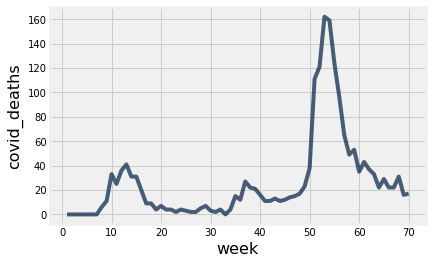

In [38]:
korea_graph = covid_death_korea.select('start_date','end_date','total_deaths','covid_deaths')
korea_graph['week'] = np.arange(1,71)
korea_graph.select('week','covid_deaths').plot('week')

In [9]:
total_death = covid_death_korea.select('country','total_deaths','covid_deaths').group('country',np.sum)
total_death

country,total_deaths sum,covid_deaths sum
South Korea,409969,1834


In [13]:
total_death['covid/total'] = total_death.column(2)[0]/total_death.column(1)[0]
total_death

country,total_deaths sum,covid_deaths sum,covid/total
South Korea,409969,1834,0.00447351


409969.0